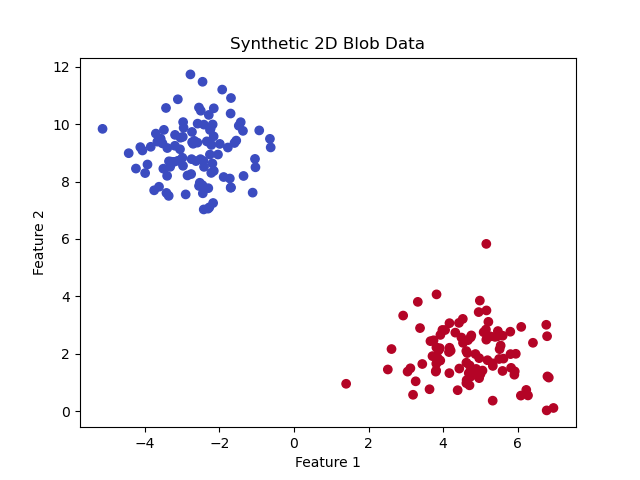

In [5]:
# Step 1: Import libraries and generate synthetic data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic 2D blobs
X, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("Synthetic 2D Blob Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [7]:
# Step 2: Define a simple Leaky Integrate-and-Fire neuron
class LIFNeuron:
    def __init__(self, threshold=1.0, decay=0.9):
        self.threshold = threshold
        self.decay = decay
        self.potential = 0.0  # membrane potential

    def step(self, input_current):
        self.potential *= self.decay
        self.potential += input_current
        
        if self.potential >= self.threshold:
            self.potential = 0.0  # reset after spike
            return 1
        else:
            return 0


In [9]:
# Step 3: Initialize weights, bias and neuron
np.random.seed(42)
weights = np.random.rand(2) * 2 - 1  # random weights between [-1, 1]
bias = 0.0

output_neuron = LIFNeuron(threshold=1.0, decay=0.8)

def simulate_spiking(input_features, weights, bias, time_steps=10):
    spikes = []
    for t in range(time_steps):
        input_current = np.dot(input_features, weights) + bias
        spike = output_neuron.step(input_current)
        spikes.append(spike)
    return spikes


In [11]:
sample_input = X[0]
spike_train = simulate_spiking(sample_input, weights, bias)

print(f"Input features: {sample_input}")
print(f"Spike train over time steps: {spike_train}")


Input features: [3.04545118 1.37379466]
Spike train over time steps: [0, 0, 1, 0, 0, 1, 0, 0, 1, 0]


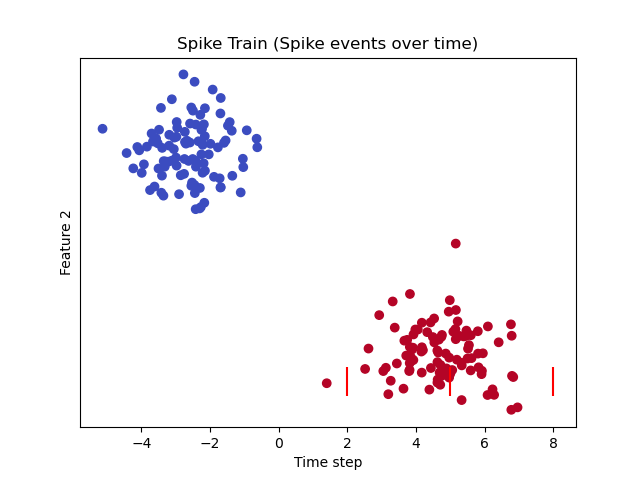

In [13]:
def plot_spike_train(spike_train):
    plt.eventplot([i for i, val in enumerate(spike_train) if val == 1], colors='r')
    plt.title("Spike Train (Spike events over time)")
    plt.xlabel("Time step")
    plt.yticks([])
    plt.show()

plot_spike_train(spike_train)


Sample 0 - Class 1 - Spikes: [0, 0, 1, 0, 0, 1, 0, 0, 1, 0]


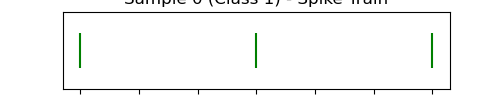

Sample 1 - Class 1 - Spikes: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


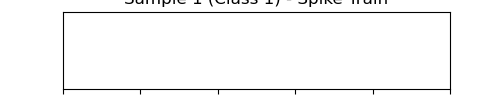

Sample 2 - Class 1 - Spikes: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


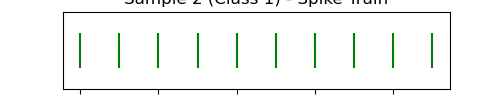

Sample 3 - Class 0 - Spikes: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


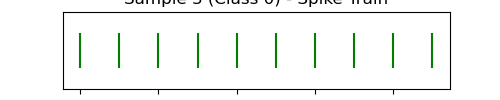

Sample 4 - Class 1 - Spikes: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


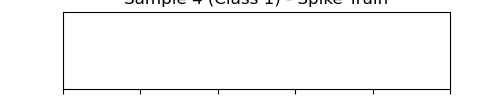

In [15]:
# Reset neuron before each sample simulation
for i in range(5):
    output_neuron.potential = 0  # reset membrane potential
    sample_input = X[i]
    label = y[i]
    spikes = simulate_spiking(sample_input, weights, bias)
    
    print(f"Sample {i} - Class {label} - Spikes: {spikes}")
    
    # Plot spike train
    plt.figure(figsize=(5, 1))
    plt.eventplot([i for i, val in enumerate(spikes) if val == 1], colors='green')
    plt.title(f"Sample {i} (Class {label}) - Spike Train")
    plt.xlabel("Time Step")
    plt.yticks([])
    plt.show()


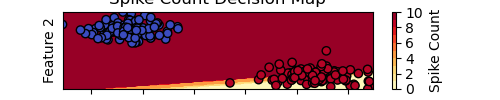

In [17]:
# Decision boundary visualize karo with spike counts
xx, yy = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 100),
                     np.linspace(X[:,1].min(), X[:,1].max(), 100))

grid_points = np.c_[xx.ravel(), yy.ravel()]
spike_counts = []

for point in grid_points:
    output_neuron.potential = 0  # reset neuron
    spikes = simulate_spiking(point, weights, bias)
    spike_counts.append(sum(spikes))  # total number of spikes

spike_counts = np.array(spike_counts).reshape(xx.shape)

plt.contourf(xx, yy, spike_counts, levels=10, cmap="YlOrRd")
plt.colorbar(label="Spike Count")
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolor='k')
plt.title("Spike Count Decision Map")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
